In [ ]:
import os
import keras
import numpy as np
from PIL import Image
import tensorflow as tf
from keras_retinanet.models import load_model, backbone, resnet
from keras_retinanet.utils.image import read_image_bgr
from shared import get_session
import matplotlib.pyplot as plt

NUM_OF_CLASSES = 40
BASE_DIR = os.getcwd()
MODEL_PATH = os.path.join(BASE_DIR, 'snapshots', 'custom_resnet50_10_test.h5')
DATASET_DIR = os.path.join(BASE_DIR, 'datasets', 'GTSDB', 'FullIJCNN2013')
TEST_IMAGE = os.path.join(DATASET_DIR, '00001.ppm')

#Initialise
keras.backend.tensorflow_backend.set_session(get_session())

#Imagenet as base
imgnet_clean = resnet.resnet_retinanet(NUM_OF_CLASSES)
backbone = backbone('resnet50')
imgnet_weights = backbone.download_imagenet()
imgnet_clean.load_weights(imgnet_weights, skip_mismatch=True, by_name=True)

#Scratch
scratch = resnet.resnet_retinanet(NUM_OF_CLASSES)

#Trained on traffic signs
model = load_model(MODEL_PATH)

In [ ]:
#print([layer.name for layer in model.layers])
#layers = list(map(lambda x: "Layer: "+x.name + "shape: "+ str(np.asarray(x.get_weights()).shape), model.layers))
#for layer in layers:
#    print(layer)

def plot_conv1_weights(weights):
    fig, ax = plt.subplots(figsize=(5, 5),nrows=8, ncols=8)
    for i, ax in enumerate(ax.reshape(-1)):
        imgArray = weights[0,:,:,:,i]
        # unity-based normalization https://datascience.stackexchange.com/a/5888
        imgArray = (imgArray - np.min(imgArray)) / (np.max(imgArray) - np.min(imgArray))
        ax.imshow(imgArray)
        ax.axis('off')
    plt.show()

In [ ]:
#trained_model_conv1_weights = np.asarray(model.get_layer('conv1').get_weights())
#imagenet_model_conv1_weights = np.asarray(imgnet_clean.get_layer('conv1').get_weights())
#scratch_model_conv1_weights = np.asarray(scratch.get_layer('conv1').get_weights())

#plot_conv1_weights(trained_model_conv1_weights)
#plot_conv1_weights(imagenet_model_conv1_weights)
#plot_conv1_weights(scratch_model_conv1_weights)

## Test visualisation of average images

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from paths import *
from PIL import Image

classes_train = []
images_train = []
ROI = []

sns.set()

with open(TRAIN_GROUND_TRUTH_COMBINED, 'r') as fp:
    for line in fp:
        data = line.strip().split(',')
        ROI.append([int(data[1]), int(data[2]), int(data[3]), int(data[4])])
        images_train.append(np.array(Image.open(data[0])))
        classes_train.append(int(data[5]))

In [2]:
images_cropped = []

for idx, val in enumerate(images_train):
    im = images_train[idx]
    x1 = ROI[idx][0]
    y1 = ROI[idx][1]
    x2 = ROI[idx][2]
    y2 = ROI[idx][3]

    im = im[y1:y2,x1:x2,:]
    im = Image.fromarray(im.astype('uint8'))
    im = im.resize((128, 128), Image.ANTIALIAS)
    images_cropped.append(np.array(im))
    im.close()
    
    #plt.imshow(im)
    #plt.show()
    #im.close()

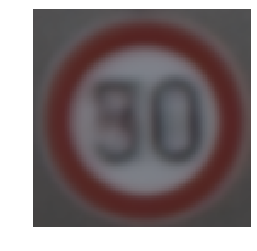

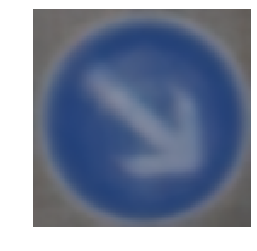

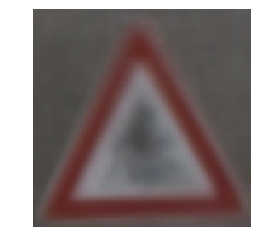

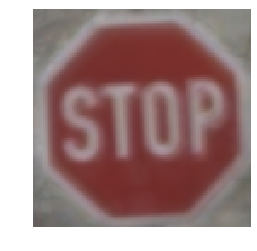

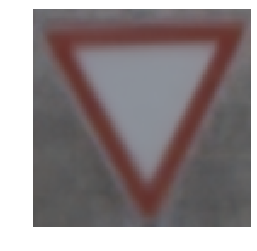

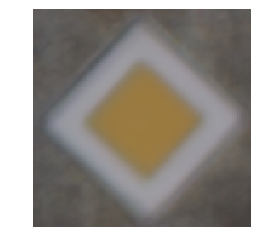

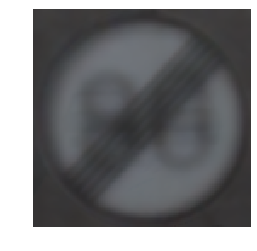

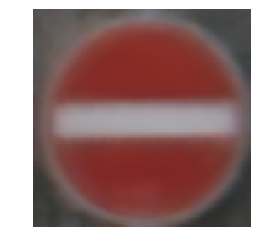

In [4]:
classes_train = np.array(classes_train)
images_cropped = np.array(images_cropped)

images_cropped_averages = [np.mean(images_cropped[np.nonzero(classes_train == i)], axis=0) for i in range(0, 8)]

for i in range(0, 8):
    im = Image.fromarray(images_cropped_averages[i].astype('uint8'))
    plt.imshow(im)
    plt.axis('off')
    plt.show()
    im.close()

In [ ]:
    
#f, axarr = plt.subplots(nrows=2, ncols=5)
#for i, ax in enumerate(axarr.reshape(-1)):
#    images[i] = images[i].reshape((28,28))
#    ax.imshow(images[i], cmap='gray')
#    ax.axis('off')
#    ax.set_title('{label}'.format(label=str(i)))
#plt.show()

#with open(TEST_GROUND_TRUTH_COMBINED, 'r') as fp:
#    for line in fp:
#        classes_train.append(int(line[line.rfind(',')+1:]))

#total = classes_train + classes_test
#count_train = {i:classes_train.count(i) for i in classes_train}   
#count_test = {i:classes_test.count(i) for i in classes_test}    
#count_total = {i:total.count(i) for i in total}  

#Training
#for idx in count_total:
#    print("Class {} : {}".format(idx,count_train[idx]))

#for i in range(43):
#    if not i in(classes_train):
#        print("Class {} not represented!!!".format(i))
